## Datacamp
### Joining Data with Pandas
#### Merging Tables With Different Join Types 
Kadriye Tuba Türkcan Karaca

## Counting missing rows with left join
The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the movies table and the financials table.



In [15]:
import pandas as pd

In [3]:
movies = pd. read_pickle('movies.p')

In [4]:
movies

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17
...,...,...,...,...
4798,3089,Red River,5.344815,1948-08-26
4799,11934,The Hudsucker Proxy,14.188982,1994-03-11
4800,13807,Exiled,8.486390,2006-09-06
4801,73873,Albert Nobbs,7.802245,2011-12-21


In [5]:
financials = pd.read_pickle('financials.p')

In [6]:
financials

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08
...,...,...,...
3224,2292,27000,3.151130e+06
3225,692,12000,6.000000e+06
3226,36095,20000,9.900000e+04
3227,14337,7000,4.247600e+05


## Question
What column is likely the best column to merge the two tables on?

## Possible Answers

on='budget'

on='popularity'

on='id'

Merge the movies table, as the left table, with the financials table using a left join, and save the result to movies_financials.



In [7]:
# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on = 'id', how='left')
movies_financials

,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0
...,...,...,...,...,...,...
4798,3089,Red River,5.344815,1948-08-26,3000000.0,9012000.0
4799,11934,The Hudsucker Proxy,14.188982,1994-03-11,NaN,NaN
4800,13807,Exiled,8.486390,2006-09-06,NaN,NaN
4801,73873,Albert Nobbs,7.802245,2011-12-21,8000000.0,5634828.0


Count the number of rows in movies_financials with a null value in the budget column.



In [8]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isna().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


We used a left join to find out which rows in the financials table were missing data. When performing a left join, the .merge() method returns a row full of null values for columns in the right table if the key column does not have a matching value in both tables. We see that there are at least 1,500 rows missing data. Wow! That sounds like a lot of work.

## Enriching a dataset
Setting how='left' with the .merge()method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, we will start off with a sample of movie data from the movie series Toy Story. Our goal is to enrich this data by adding the marketing tag line for each movie. We will compare the results of a left join versus an inner join.

The toy_story DataFrame contains the Toy Story movies. 

In [9]:
toy_story = movies[movies['title'].isin (['Toy Story', 'Toy Story 3', 'Toy Story 2'])]
toy_story

,id,title,popularity,release_date
103,10193,Toy Story 3,59.995418,2010-06-16
2637,863,Toy Story 2,73.575118,1999-10-30
3716,862,Toy Story,73.640445,1995-10-30


In [10]:
taglines = pd.read_pickle('taglines.p')

In [11]:
taglines

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."
...,...,...
4795,124606,Sometimes you've got to break the rules
4796,14337,What happens if it actually works?
4798,9367,"He didn't come looking for trouble, but troubl..."
4799,72766,A newlywed couple's honeymoon is upended by th...


Merge toy_story and taglines on the id column with a left join, and save the result as toystory_tag

In [12]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on = 'id', how = 'left')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
2    862    Toy Story   73.640445   1995-10-30                       NaN
(3, 5)


With toy_story as the left table, merge to it taglines on the id column with an inner join, and save as toystory_tag.

In [13]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on = 'id')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
(2, 5)


That's fantastic work! If our goal is to enhance or enrich a dataset, then we do not want to lose any of your original data. A left join will do that by returning all of the rows of our left table, while using an inner join may result in lost data if it does not exist in both tables.

 A left join will return all of the rows from the left table. If those rows in the left table match multiple rows in the right table, then all of those rows will be returned. Therefore, the returned rows must be equal to if not greater than the left table. Knowing what to expect is useful in troubleshooting any suspicious merges.

## Right join to find unique movies
Most of the recent big-budget science fiction movies can also be classified as action movies. We have a table of science fiction movies called scifi_movies and another table of action movies called action_movies. Our goal is to find which movies are considered only science fiction movies. Once we have this table, we can merge the movies table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.


In [15]:
genres = pd.read_pickle('movie_to_genres.p')

In [16]:
genres

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure
...,...,...
12155,426469,Drama
12156,433715,Thriller
12157,433715,Drama
12158,447027,Family


In [17]:
scifi_movies = genres[genres['genre'] == 'Science Fiction']
scifi_movies

,movie_id,genre
2,11,Science Fiction
17,18,Science Fiction
20,19,Science Fiction
38,38,Science Fiction
49,62,Science Fiction
...,...,...
12000,335866,Science Fiction
12020,347548,Science Fiction
12063,360188,Science Fiction
12092,367551,Science Fiction


In [18]:
action_movies = genres[genres['genre'] == 'Action']
action_movies

,movie_id,genre
3,11,Action
14,18,Action
25,22,Action
26,24,Action
42,58,Action
...,...,...
12126,381902,Action
12128,385383,Action
12136,389425,Action
12144,407887,Action


Merge action_movies and scifi_movies tables with a right join on movie_id. Save the result as action_scifi.



In [20]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right')

print(action_scifi)

     movie_id genre_x          genre_y
0          11  Action  Science Fiction
1          18  Action  Science Fiction
2          19     NaN  Science Fiction
3          38     NaN  Science Fiction
4          62     NaN  Science Fiction
..        ...     ...              ...
530    335866     NaN  Science Fiction
531    347548     NaN  Science Fiction
532    360188     NaN  Science Fiction
533    367551  Action  Science Fiction
534    371690     NaN  Science Fiction

[535 rows x 3 columns]


Update the merge to add suffixes, where '_act' and '_sci' are suffixes for the left and right tables, respectively.

In [21]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes = ['_act', '_sci'])

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction


From action_scifi, subset only the rows where the genre_act column is null.

In [22]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isna()]
print(scifi_only)

     movie_id genre_act        genre_sci
2          19       NaN  Science Fiction
3          38       NaN  Science Fiction
4          62       NaN  Science Fiction
5          68       NaN  Science Fiction
6          74       NaN  Science Fiction
..        ...       ...              ...
529    333371       NaN  Science Fiction
530    335866       NaN  Science Fiction
531    347548       NaN  Science Fiction
532    360188       NaN  Science Fiction
534    371690       NaN  Science Fiction

[258 rows x 3 columns]


Merge movies and scifi_only using the id column in the left table and the movie_id column in the right table with an inner join.

In [25]:
movies

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17
...,...,...,...,...
4798,3089,Red River,5.344815,1948-08-26
4799,11934,The Hudsucker Proxy,14.188982,1994-03-11
4800,13807,Exiled,8.486390,2006-09-06
4801,73873,Albert Nobbs,7.802245,2011-12-21


In [23]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on = 'id', right_on = 'movie_id' )

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


Right join to the rescue! We found over 250 action only movies by merging action_movies and scifi_movies using a right join. With this, we were able to find the rows not found in the action_movies table. Additionally, we used the left_on and right_on arguments to merge in the movies table. 

## Popular genres with right join
What are the genres of the most popular movies? To answer this question, we need to merge data from the movies and movie_to_genres tables. In a table called pop_movies, the top 10 most popular movies in the movies table have been selected. To ensure that we are analyzing all of the popular movies, merge it with the movie_to_genres table using a right join. To complete our analysis, we will count the number of different genres. Also, the two tables can be merged by the movie ID. However, in pop_movies that column is called id, and in movies_to_genres it's called movie_id.


In [26]:
movie_to_genres = genres

In [27]:
movie_to_genres

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure
...,...,...
12155,426469,Drama
12156,433715,Thriller
12157,433715,Drama
12158,447027,Family


In [33]:
pop_movies = movies.sort_values(by = 'popularity', ascending = False)[:10]

In [34]:
pop_movies

,id,title,popularity,release_date
4546,211672,Minions,875.581305,2015-06-17
4343,157336,Interstellar,724.247784,2014-11-05
1966,293660,Deadpool,514.569956,2016-02-09
2423,118340,Guardians of the Galaxy,481.098624,2014-07-30
4220,76341,Mad Max: Fury Road,434.278564,2015-05-13
1867,135397,Jurassic World,418.708552,2015-06-09
4375,22,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
1106,119450,Dawn of the Planet of the Apes,243.791743,2014-06-26
4216,131631,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
2614,177572,Big Hero 6,203.734590,2014-10-24


Merge movie_to_genres and pop_movies using a right join. Save the results as genres_movies.

In [35]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on ='movie_id', 
                                     right_on='id')

print(genres_movies)

    movie_id            genre      id  \
0     211672           Comedy  211672   
1     211672        Adventure  211672   
2     211672        Animation  211672   
3     211672           Family  211672   
4     157336            Drama  157336   
5     157336  Science Fiction  157336   
6     157336        Adventure  157336   
7     293660        Adventure  293660   
8     293660           Action  293660   
9     293660           Comedy  293660   
10    118340        Adventure  118340   
11    118340  Science Fiction  118340   
12    118340           Action  118340   
13     76341           Action   76341   
14     76341  Science Fiction   76341   
15     76341        Adventure   76341   
16     76341         Thriller   76341   
17    135397         Thriller  135397   
18    135397        Adventure  135397   
19    135397           Action  135397   
20    135397  Science Fiction  135397   
21        22          Fantasy      22   
22        22        Adventure      22   
23        22    

Group genres_movies by genre and count the number of id values.

In [37]:
import matplotlib.pyplot as plt

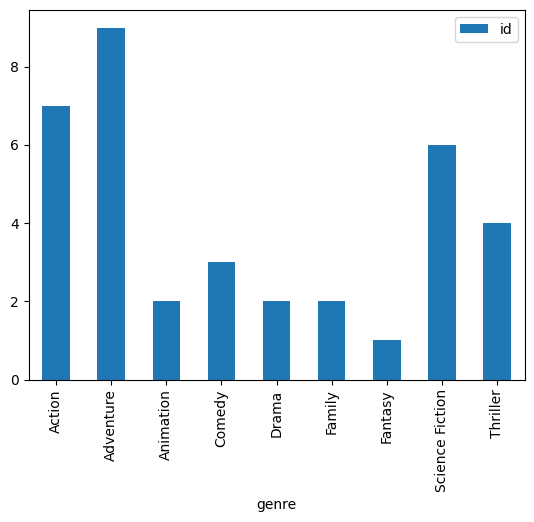

In [38]:
# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

The right join ensured that we were analyzing all of the pop_movies. We can see from the results that adventure and action are the most popular genres.

## Using outer join to select actors
One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, we can use it to find rows that do not have a match in the other table. To try for ourselves, we have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The Iron Man 1 table is called iron_1_actors, and Iron Man 2 table is called iron_2_actors. 

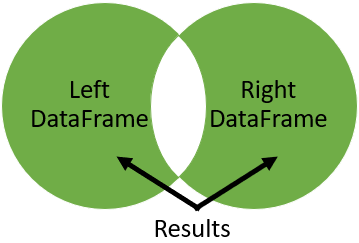

In [44]:
casts = pd.read_pickle('casts.p')

In [45]:
casts

,movie_id,cast_id,character,gender,id,name
7,5,22,Jezebel,1,3122,Sammi Davis
8,5,23,Diana,1,3123,Amanda de Cadenet
9,5,24,Athena,1,3124,Valeria Golino
3,5,25,Elspeth,1,3125,Madonna
12,5,26,Eva,1,3126,Ione Skye
...,...,...,...,...,...,...
0,433715,3,Amber,0,1500111,Nicole Smolen
1,433715,4,BB,0,1734573,Kim Baldwin
2,433715,5,Sugar,0,1734574,Ariana Stephens
3,433715,6,Drew,0,1734575,Bryson Funk


In [58]:
actor_movies = pd.read_csv('actors_movies.csv')
actor_movies

,Actor,Title
0,"[Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...",The Matrix
1,"[Hugo Weaving,Laurence Fishburne,Carrie-Anne M...",The Matrix Reloaded
2,"[Hugo Weaving,Laurence Fishburne,Carrie-Anne M...",The Matrix Revolutions
3,"[Al Pacino,Charlize Theron,Keanu Reeves]",The Devil's Advocate
4,"[James Marshall,Kevin Pollak,J.T. Walsh,Aaron ...",A Few Good Men
5,"[Val Kilmer,Meg Ryan,Tom Skerritt,Kelly McGill...",Top Gun
6,"[Jerry O'Connell,Bonnie Hunt,Jay Mohr,Cuba Goo...",Jerry Maguire
7,"[Jerry O'Connell,River Phoenix,Marshall Bell,W...",Stand By Me
8,"[Helen Hunt,Jack Nicholson,Cuba Gooding Jr.,Gr...",As Good as It Gets
9,"[Robin Williams,Cuba Gooding Jr.,Max von Sydow...",What Dreams May Come


In [64]:
actor_movies[actor_movies['Title'] == 'Iron Man']

,Actor,Title


In [55]:
iron_1_actors = casts[casts['name'].isin(['Shaun Toub', 'Gwyneth Paltrow', 'Jeff Bridges', 'Terrence Howard', 'Leslie Bibb', 'Faran Tahir', 'Robert Downey Jr.', 'Clark Gregg', 'Sayed Badreya', 'Paul Bettany', 'Jon Favreau', 'Peter Billingsley', 'Tim Guinee', 'Samuel L. Jackson', 'Bill Smitrovich', 'Will Lyman', 'Tom Morello', 'Marco Khan', 'Daston Kalili', 'Ido Ezra', 'Kevin Foster', 'Garret Noël', 'Eileen Weisinger', 'Ahmed Ahmed', 'Fahim Fazli', 'Gerard Sanders', 'Tim Rigby', 'Russell Richardson', 'Nazanin Boniadi', 'Thomas Craig Plumer', 'Robert Berkman', 'Stacy Stas', 'Lauren Scyphers', 'Frank Nyi', 'Marvin Jordan', 'Jim Cramer', 'Donna Evans', 'Reid Harper', 'Summer Kylie Remington', 'Ava Rose Williams', 'Vladimir Kubr', 'Callie Croughwell', 'Javan Tahir', 'Sahar Bibiyan', "Patrick O'Connell", 'Adam Harrington', 'Meera Simhan', 'Ben Newmark', 'Ricki Lander', 'Jeannine Kaspar', 'Sarah Cahill', 'Stan Lee', 'Justin Rex', 'Zorianna Kit', 'Lana Kinnear', 'Nicole Lindeblad', 'Masha Lund', 'Gabrielle Tuite', 'Tim Griffin', 'Joshua Harto', 'Micah A. Hauptman', 'James Bethea', 'Jeffrey Ashkin', 'Russell Bobbitt', 'Vianessa Castaños', 'Mike Cochrane', 'Crystal Marie Denha', 'Mellany Gandara', 'Halla', 'Rodrick Hersh', 'Kristin J. Hooper', 'Chris Jalandoni', 'Steve Janousek', 'Laura Liguori', 'Flavia Manes Rossi', 'Anthony Martins', 'Robert McMurrer', 'James M. Myers', 'America Olivo', 'Sylvette Ortiz', 'Brett Padelford', 'Ajani Perkins', 'Chris Reid', 'Toi Rose', 'George F. Watson', 'David Zyler', 'Nick W. Nicholson'])]
iron_1_actors

,movie_id,cast_id,character,gender,id,name
11,25,23,Branded Marine,2,95698,Kevin Foster
45,70,70,Boxing Fan (uncredited),0,1209723,Robert McMurrer
0,115,12,The Dude,2,1229,Jeff Bridges
17,155,260,Reese,2,34544,Joshua Harto
0,167,2,Dr. Mark Powell,2,1229,Jeff Bridges
...,...,...,...,...,...,...
4,328425,13,Kevin 'KK' Keelor,2,27031,Tim Griffin
92,329833,107,'Old and Lame' Show Attendee,1,142213,Nazanin Boniadi
5,342502,13,Apache,2,54809,Marco Khan
26,394047,32,Deputy #1,2,1209727,Ajani Perkins


Save to iron_1_and_2 the merge of iron_1_actors (left) with iron_2_actors tables with an outer join on the id column, and set suffixes to ('_1','_2').
Create an index that returns True if name_1 or name_2 are null, and False otherwise.

## Self join
Merging a table to itself can be useful when we want to compare values in a column to other values in the same column. In this exercise, we will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. We have been given a table called crews, which has columns id, job, and name. First, merge the table to itself using the movie ID. This merge will give us a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.



In [16]:
import pandas as pd

In [17]:
crews = pd.read_pickle('crews.p')

In [18]:
crews

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron
...,...,...,...,...
129574,126186,Directing,Director,Daniel Hsia
129576,25975,Production,Executive Producer,Clark Peterson
129578,25975,Directing,Director,Brian Herzlinger
129579,25975,Directing,Director,Jon Gunn


To a variable called crews_self_merged, merge the crews table to itself on the id column using an inner join, setting the suffixes to '_dir' and '_crew' for the left and right tables respectively.



In [20]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', suffixes = ['_dir', '_crew'])
crews_self_merged

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron
...,...,...,...,...,...,...,...
834189,25975,Directing,Director,Jon Gunn,Directing,Director,Brett Winn
834190,25975,Directing,Director,Brett Winn,Production,Executive Producer,Clark Peterson
834191,25975,Directing,Director,Brett Winn,Directing,Director,Brian Herzlinger
834192,25975,Directing,Director,Brett Winn,Directing,Director,Jon Gunn


Create a Boolean index, named boolean_filter, that selects rows from the left table with the job of 'Director' and avoids rows with the job of 'Director' in the right table.



In [21]:
# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
     (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]
direct_crews

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays
...,...,...,...,...,...,...,...
834166,72766,Directing,Director,Edward Burns,Editing,Editor,Janet Gaynor
834174,231617,Directing,Director,Scott Smith,Production,Executive Producer,Scott Smith
834182,25975,Directing,Director,Brian Herzlinger,Production,Executive Producer,Clark Peterson
834186,25975,Directing,Director,Jon Gunn,Production,Executive Producer,Clark Peterson


In [22]:
direct_crews.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays


By merging the table to itself, we compared the value of the director from the jobs column to other values from the jobs column. With the output, we can quickly see different movie directors and the people they worked with in the same movie.

## Index merge for movie ratings
To practice merging on indexes, we will merge movies and a table called ratings that holds info about movie ratings. Make sure our merge returns all of the rows from the movies table and not all the rows of ratings table need to be included in the result.


In [29]:
ratings = pd.read_pickle('ratings.p')

In [32]:
movies = pd.read_pickle('movies.p')

Merge movies and ratings on the index and save to a variable called movies_ratings, ensuring that all of the rows from the movies table are returned.

In [31]:
ratings = ratings.set_index('id')

In [34]:
movies = movies.set_index('id')

In [35]:
ratings

,vote_average,vote_count
id,,
19995,7.2,11800.0
285,6.9,4500.0
206647,6.3,4466.0
49026,7.6,9106.0
49529,6.1,2124.0
...,...,...
9367,6.6,238.0
72766,5.9,5.0
231617,7.0,6.0


In [36]:
movies

,title,popularity,release_date
id,,,
257,Oliver Twist,20.415572,2005-09-23
14290,Better Luck Tomorrow,3.877036,2002-01-12
38365,Grown Ups,38.864027,2010-06-24
9672,Infamous,3.680896,2006-11-16
12819,Alpha and Omega,12.300789,2010-09-17
...,...,...,...
3089,Red River,5.344815,1948-08-26
11934,The Hudsucker Proxy,14.188982,1994-03-11
13807,Exiled,8.486390,2006-09-06


In [37]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on='id')

# Print the first few rows of movies_ratings
print(movies_ratings.head())

                      title  popularity release_date  vote_average  vote_count
id                                                                            
257            Oliver Twist   20.415572   2005-09-23           6.7       274.0
14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5        27.0
38365             Grown Ups   38.864027   2010-06-24           6.0      1705.0
9672               Infamous    3.680896   2006-11-16           6.4        60.0
12819       Alpha and Omega   12.300789   2010-09-17           5.3       124.0


## Do sequels earn more?
Now, we'll find out which movie sequels earned the most compared to the original movie. To answer this question, we will merge a modified version of the sequels and financials tables where their index is the movie ID. We will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. From there, we will join the resulting table to itself so that we can compare the revenue values of the original movie to the sequel. Next, we will calculate the difference between the two revenues and sort the resulting dataset.



In [38]:
sequels = pd.read_pickle('sequels.p')

In [39]:
sequels

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>
...,...,...,...
4798,133931,Zambezia,<NA>
4799,309503,Zipper,<NA>
4800,34592,ZMD: Zombies of Mass Destruction,<NA>
4801,206213,Zombie Hunter,<NA>


In [40]:
sequels=sequels.set_index('id')

In [41]:
sequels

,title,sequel
id,,
19995,Avatar,<NA>
862,Toy Story,863
863,Toy Story 2,10193
597,Titanic,<NA>
24428,The Avengers,<NA>
...,...,...
133931,Zambezia,<NA>
309503,Zipper,<NA>
34592,ZMD: Zombies of Mass Destruction,<NA>


In [43]:
financials = pd.read_pickle('financials.p')

In [44]:
financials

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08
...,...,...,...
3224,2292,27000,3.151130e+06
3225,692,12000,6.000000e+06
3226,36095,20000,9.900000e+04
3227,14337,7000,4.247600e+05


In [45]:
financials= financials.set_index('id')
financials

,budget,revenue
id,,
19995,237000000,2.787965e+09
285,300000000,9.610000e+08
206647,245000000,8.806746e+08
49026,250000000,1.084939e+09
49529,260000000,2.841391e+08
...,...,...
2292,27000,3.151130e+06
692,12000,6.000000e+06
36095,20000,9.900000e+04


With the sequels table on the left, merge to it the financials table on index named id, ensuring that all the rows from the sequels are returned and some rows from the other table may not be returned, Save the results to sequels_fin.

In [47]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')
sequels_fin

,title,sequel,budget,revenue
id,,,,
19995,Avatar,<NA>,237000000.0,2.787965e+09
862,Toy Story,863,30000000.0,3.735540e+08
863,Toy Story 2,10193,90000000.0,4.973669e+08
597,Titanic,<NA>,200000000.0,1.845034e+09
24428,The Avengers,<NA>,220000000.0,1.519558e+09
...,...,...,...,...
133931,Zambezia,<NA>,NaN,NaN
309503,Zipper,<NA>,NaN,NaN
34592,ZMD: Zombies of Mass Destruction,<NA>,NaN,NaN


Merge the sequels_fin table to itself with an inner join, where the left and right tables merge on sequel and id respectively with suffixes equal to ('_org','_seq'), saving to orig_seq.



In [48]:
# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index= True,
                             suffixes=['_org','_seq'])
orig_seq

,sequel,title_org,sequel_org,budget_org,revenue_org,title_seq,sequel_seq,budget_seq,revenue_seq
id,,,,,,,,,
862,863,Toy Story,863,30000000.0,373554033.0,Toy Story 2,10193,90000000.0,4.973669e+08
863,10193,Toy Story 2,10193,90000000.0,497366869.0,Toy Story 3,<NA>,200000000.0,1.066970e+09
675,767,Harry Potter and the Order of the Phoenix,767,150000000.0,938212738.0,Harry Potter and the Half-Blood Prince,<NA>,250000000.0,9.339592e+08
121,122,The Lord of the Rings: The Two Towers,122,79000000.0,926287400.0,The Lord of the Rings: The Return of the King,<NA>,94000000.0,1.118889e+09
120,121,The Lord of the Rings: The Fellowship of the Ring,121,93000000.0,871368364.0,The Lord of the Rings: The Two Towers,122,79000000.0,9.262874e+08
...,...,...,...,...,...,...,...,...,...
76,80,Before Sunrise,80,2500000.0,5535405.0,Before Sunset,132344,2700000.0,1.599262e+07
2292,2295,Clerks,2295,27000.0,3151130.0,Clerks II,<NA>,5000000.0,2.688838e+07
9367,8068,El Mariachi,8068,220000.0,2040920.0,Desperado,1428,7000000.0,2.540544e+07


In [49]:
# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']


Select the title_org, title_seq, and diff columns of orig_seq and save this as titles_diff.

In [51]:
# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org', 'title_seq', 'diff']]
titles_diff

,title_org,title_seq,diff
id,,,
862,Toy Story,Toy Story 2,123812836.0
863,Toy Story 2,Toy Story 3,569602834.0
675,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince,-4253541.0
121,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King,192601579.0
120,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers,54919036.0
...,...,...,...
76,Before Sunrise,Before Sunset,10457210.0
2292,Clerks,Clerks II,23737246.0
9367,El Mariachi,Desperado,23364525.0


Sort by titles_diff by diff in descending order and print the first few rows.

In [53]:
# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values(by = 'diff', ascending = False).head())

               title_org        title_seq          diff
id                                                     
331    Jurassic Park III   Jurassic World  1.144748e+09
272        Batman Begins  The Dark Knight  6.303398e+08
10138         Iron Man 2       Iron Man 3  5.915067e+08
863          Toy Story 2      Toy Story 3  5.696028e+08
10764  Quantum of Solace          Skyfall  5.224703e+08


We found out that Jurassic World had one of the highest of all, improvement in revenue compared to the original movie.